In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
train =pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
train.head()

,Customer_ID,Sex,Earnings,Region_Code,Marital Status,State_of_Origin,Customer_Worth,Customer_Reply,Plan,Certification,...,Vehicle Class,Vehicle Size,Months Since Last Claim,Months Since Policy Inception,Counts_of_Open_Complaints,No_Of_POlicy,kind_of_policy,Active_Policy,Sales Channel,Best_Offer
0,Customer_434,Female,97134,Suburban,Single,Kano,5017.009472,Interested,Silver,First_Degree,...,SUV,Medsize,12,15,0,1,Corporate,C_L2,Agent,1
1,Customer_4641,Female,53754,Suburban,Married,Abuja,5151.301306,Not_interested,Silver,First_Degree,...,SUV,Small,5,2,0,1,Personal,P_L2,Agent,3
2,Customer_4952,Female,25804,Suburban,Divorced,Lagos,4906.894731,Interested,Silver,HND,...,Sports Car,Medsize,3,51,0,1,Personal,P_L3,Agent,0
3,Customer_1489,Female,0,Suburban,Single,Imo,8512.525936,Not_interested,Silver,HND,...,Sports Car,Medsize,5,94,0,8,Personal,P_L2,Branch,1
4,Customer_812,Male,140494,Rural,Single,Imo,3280.531880,Not_interested,Silver,PHD,...,Four-Door Car,Medsize,13,19,2,1,Personal,P_L2,Call Center,3


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6393 entries, 0 to 6392
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer_ID                    6393 non-null   object 
 1   Sex                            6393 non-null   object 
 2   Earnings                       6393 non-null   int64  
 3   Region_Code                    6393 non-null   object 
 4   Marital Status                 6393 non-null   object 
 5   State_of_Origin                6393 non-null   object 
 6   Customer_Worth                 6393 non-null   float64
 7   Customer_Reply                 6393 non-null   object 
 8   Plan                           6393 non-null   object 
 9   Certification                  6393 non-null   object 
 10  Effective To Date              6393 non-null   object 
 11  Status_of_Employment           6393 non-null   object 
 12  Premium_Auto_per_Month         6393 non-null   i

In [5]:
train.describe()

,Earnings,Customer_Worth,Premium_Auto_per_Month,Total Claim Amount,Months Since Last Claim,Months Since Policy Inception,Counts_of_Open_Complaints,No_Of_POlicy,Best_Offer
count,6393.000000,6393.000000,6393.000000,6393.000000,6393.000000,6393.000000,6393.000000,6393.000000,6393.000000
mean,75460.097294,7977.945276,186.728297,435.023938,15.100266,47.987956,0.768340,2.986235,0.968247
std,60449.019210,6718.376651,69.099601,292.522148,10.112762,27.853750,1.845483,2.399311,1.010780
min,0.000000,1900.007675,122.000000,0.099007,0.000000,0.000000,0.000000,1.000000,0.000000
25%,20674.000000,4070.092649,136.000000,273.250112,6.000000,24.000000,0.000000,1.000000,0.000000
50%,67934.000000,5813.996703,166.000000,381.118731,14.000000,48.000000,0.000000,2.000000,1.000000
75%,124652.000000,8988.610653,218.000000,547.200000,23.000000,71.000000,0.000000,4.000000,2.000000
max,199962.000000,83327.381190,594.000000,2893.239678,35.000000,99.000000,10.000000,9.000000,3.000000


In [7]:
train.shape

(6393, 24)

In [8]:
train.dtypes

Customer_ID                       object
Sex                               object
Earnings                           int64
Region_Code                       object
Marital Status                    object
State_of_Origin                   object
Customer_Worth                   float64
Customer_Reply                    object
Plan                              object
Certification                     object
Effective To Date                 object
Status_of_Employment              object
Premium_Auto_per_Month             int64
Total Claim Amount               float64
Vehicle Class                     object
Vehicle Size                      object
Months Since Last Claim            int64
Months Since Policy Inception      int64
Counts_of_Open_Complaints          int64
No_Of_POlicy                       int64
kind_of_policy                    object
Active_Policy                     object
Sales Channel                     object
Best_Offer                         int64
dtype: object

In [9]:
train.drop('Customer_ID', axis=1, inplace=True) 
test.drop('Customer_ID', axis=1, inplace=True) 

In [10]:
cat_feat = list(train.select_dtypes(exclude = np.number).columns)
num_feat = list(train.select_dtypes(exclude = object).columns)

In [12]:
train.head()

,Sex,Earnings,Region_Code,Marital Status,State_of_Origin,Customer_Worth,Customer_Reply,Plan,Certification,Effective To Date,...,Vehicle Class,Vehicle Size,Months Since Last Claim,Months Since Policy Inception,Counts_of_Open_Complaints,No_Of_POlicy,kind_of_policy,Active_Policy,Sales Channel,Best_Offer
0,Female,97134,Suburban,Single,Kano,5017.009472,Interested,Silver,First_Degree,3/2/2011,...,SUV,Medsize,12,15,0,1,Corporate,C_L2,Agent,1
1,Female,53754,Suburban,Married,Abuja,5151.301306,Not_interested,Silver,First_Degree,1/22/11,...,SUV,Small,5,2,0,1,Personal,P_L2,Agent,3
2,Female,25804,Suburban,Divorced,Lagos,4906.894731,Interested,Silver,HND,2/14/11,...,Sports Car,Medsize,3,51,0,1,Personal,P_L3,Agent,0
3,Female,0,Suburban,Single,Imo,8512.525936,Not_interested,Silver,HND,8/1/2011,...,Sports Car,Medsize,5,94,0,8,Personal,P_L2,Branch,1
4,Male,140494,Rural,Single,Imo,3280.531880,Not_interested,Silver,PHD,2/19/11,...,Four-Door Car,Medsize,13,19,2,1,Personal,P_L2,Call Center,3


<AxesSubplot:>

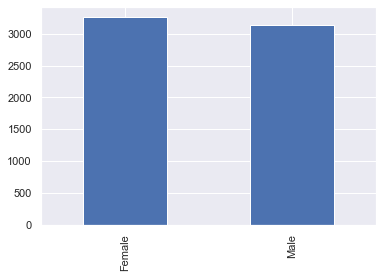

In [14]:
train['Sex'].value_counts().plot(kind ='bar')

<AxesSubplot:>

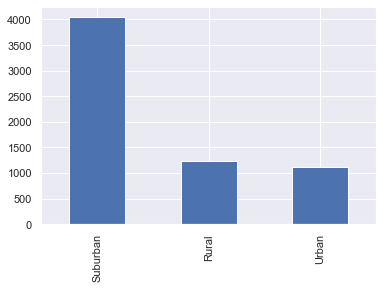

In [15]:
train['Region_Code'].value_counts().plot(kind ='bar')

In [16]:
train.columns

Index(['Sex', 'Earnings', 'Region_Code', 'Marital Status', 'State_of_Origin',
       'Customer_Worth', 'Customer_Reply', 'Plan', 'Certification',
       'Effective To Date', 'Status_of_Employment', 'Premium_Auto_per_Month',
       'Total Claim Amount', 'Vehicle Class', 'Vehicle Size',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Counts_of_Open_Complaints', 'No_Of_POlicy', 'kind_of_policy',
       'Active_Policy', 'Sales Channel', 'Best_Offer'],
      dtype='object')

<AxesSubplot:>

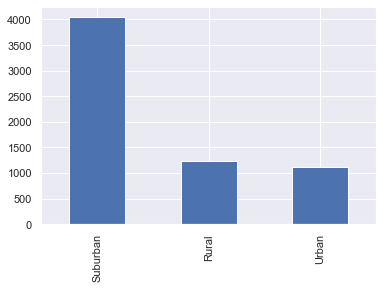

In [17]:
train['Region_Code'].value_counts().plot(kind ='bar')

<AxesSubplot:>

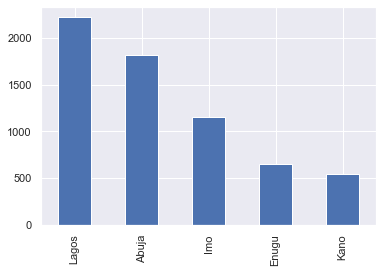

In [18]:
train['State_of_Origin'].value_counts().plot(kind ='bar')